In [1]:
import Pkg
Pkg.activate(".")
Pkg.add(["Distributions","Plots","Statistics","Turing","StatsPlots"])

  Activating project at `c:\Users\Hasta\OneDrive\Documents\!!SBU BME (B.E.-M.S.)\BME 502 (Analy App Bio Syst)\BME-502-2025`
    Updating registry at `C:\Users\Hasta\.julia\registries\General.toml`
   Resolving package versions...
   Installed AxisArrays ───────────────── v0.4.7
   Installed NaturalSort ──────────────── v1.0.0
   Installed ConsoleProgressMonitor ───── v0.1.2
   Installed LRUCache ─────────────────── v1.6.2
   Installed AbstractMCMC ─────────────── v5.6.0
   Installed AdvancedPS ───────────────── v0.6.1
   Installed StatisticalTraits ────────── v3.4.0
   Installed NNlib ────────────────────── v0.9.30
   Installed ProgressMeter ────────────── v1.10.4
   Installed Turing ───────────────────── v0.36.3
   Installed InitialValues ────────────── v0.3.1
   Installed InvertedIndices ──────────── v1.3.1
   Installed ScopedValues ─────────────── v1.3.0
   Installed Optimisers ───────────────── v0.4.6
   Installed NearestNeighbors ─────────── v0.4.21
   Installed Roots ────────────

In [2]:
using Turing, Statistics, Plots, StatsPlots, Distributions

In [3]:
invlogit(x) = exp(x)/(1+exp(x))

invlogit (generic function with 1 method)

In [4]:
dose = [-0.86,-0.3,-0.05,0.73]
n = ones(4)*5
nd = [0,1,3,5]

4-element Vector{Int64}:
 0
 1
 3
 5

In [6]:
@model function ld_50_fit(dose, deaths, n)
    α ~ Uniform(-4.0,6.0)
    β ~ Uniform(0,50)
    for i in 1:length(dose)
        θ = invlogit(α+β*dose[i])
        deaths[i] ~ Binomial(n[i],θ)
    end
end

ld_50_fit (generic function with 2 methods)

In [9]:
model1 = ld_50_fit(dose,nd,n)

DynamicPPL.Model{typeof(ld_50_fit), (:dose, :deaths, :n), (), (), Tuple{Vector{Float64}, Vector{Int64}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(Main.ld_50_fit, (dose = [-0.86, -0.3, -0.05, 0.73], deaths = [0, 1, 3, 5], n = [5.0, 5.0, 5.0, 5.0]), NamedTuple(), DynamicPPL.DefaultContext())

In [24]:
chain = Turing.sample(model1, NUTS(0.65), 1000)

┌ Info: Found initial step size
└   ϵ = 1.6


Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.08 seconds
Compute duration  = 0.08 seconds
parameters        = α, β
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           α    1.3606    1.2006    0.0695   326.5441   275.6234    0.9992     ⋯
           β   11.9640    6.0859    0.3567   326.5302   424.4934    1.0006     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           

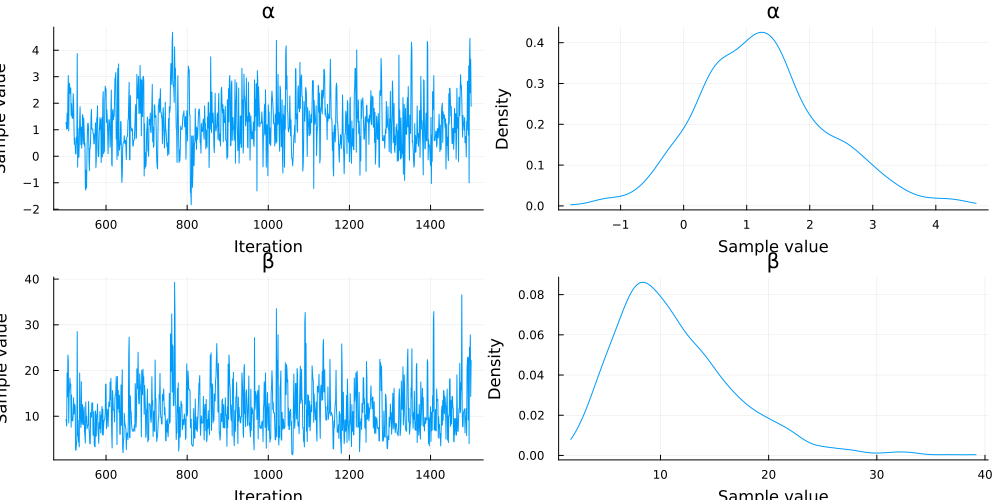

In [11]:
plot(chain)

In [13]:
a = vec(chain[:α])
b = vec(chain[:β])

1000-element reshape(::AxisArrays.AxisMatrix{Float64, Matrix{Float64}, Tuple{AxisArrays.Axis{:iter, StepRange{Int64, Int64}}, AxisArrays.Axis{:chain, UnitRange{Int64}}}}, 1000) with eltype Float64:
  9.242221932505169
  8.912438113858679
  7.853344363412103
 19.45196050429806
 14.216877645895599
 23.375196888788384
 22.090436842250906
  8.534448113548493
 14.8697292778829
 16.000852638815473
 18.33201541576249
 16.326261385140157
 17.042779023794562
  ⋮
  5.737847427879021
 20.44507076428671
 22.392120878760053
 22.954941750693187
  9.181590608327337
 22.843165781437605
  4.025481242342564
 25.04217031399009
 22.018466091938745
 27.791844504363755
 14.31978020270019
 22.17037779368798

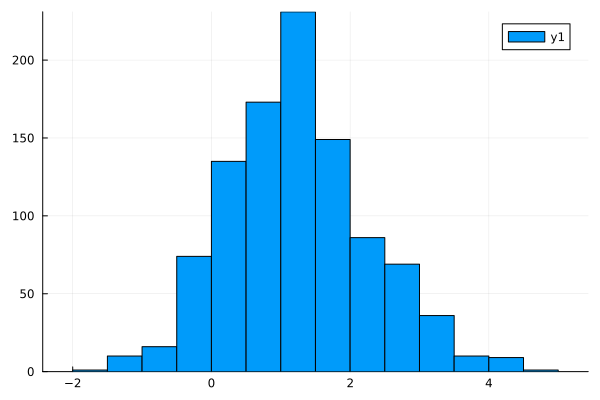

In [14]:
histogram(a)

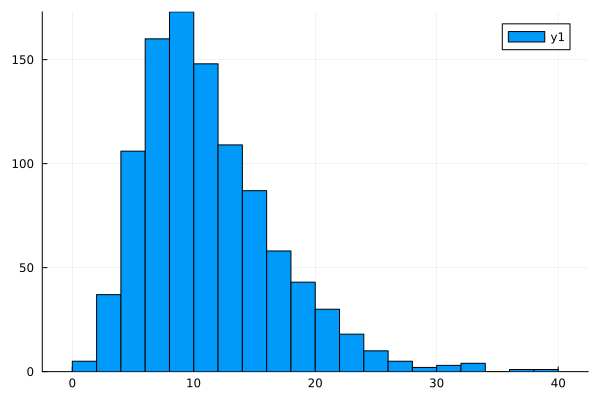

In [15]:
histogram(b)

In [17]:
ld50 = -a ./ b

1000-element Vector{Float64}:
 -0.13692163311628933
 -0.1349298920806071
 -0.1305340711256867
 -0.08364976193520361
 -0.07353641829151837
 -0.09741001841321348
 -0.1376922893525759
 -0.1121201821928192
 -0.1695193529406075
 -0.17214913790068248
 -0.13057206926133602
 -0.14464084189093449
 -0.1513670711757023
  ⋮
 -0.22821396991020415
 -0.04834725010915222
 -0.12645256722291937
 -0.10884737978740888
 -0.08671841059186365
 -0.14932365838995995
  0.2486822422496963
 -0.14348048552887063
 -0.20180030705635593
 -0.08595593520241775
 -0.25584254581094085
 -0.08491358532520107

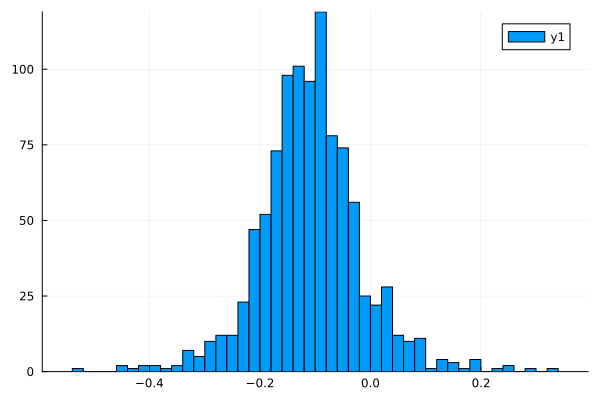

In [19]:
histogram(ld50)

In [20]:
mean(ld50)

-0.10870496654879502

In [21]:
std(ld50)

0.09268153422518753